<a href="https://colab.research.google.com/github/Abdi-dotcom/Machine-Learning-Project/blob/main/20029423_AML_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# sklearn basics
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


# IMPORTS FOR ADVANCED ML
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay

!pip install -q category_encoders shap
from category_encoders import TargetEncoder
import shap

sns.set(
    { "figure.figsize": (10, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
sns.set_theme(style="whitegrid")
# Improves plot display in Jupyter Notebook
%config InlineBackend.figure_formats = set(('retina', 'svg'))

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/adverts_cleaned.csv'
car = pd.read_csv(file_path)


In [4]:
car.head(5)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,...,price_per_mile,condition_encoded,crossover_flag,mileage_per_year,Model_Count,Age_x_Mileage,model_popularity,popularity_class,price_bucket,New_fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid,...,73970.000000,1,0,0.000000,1665,0.000000,0.258347,Medium,luxury/High-Performance,Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,...,0.064676,0,0,7730.714286,1948,162.288324,0.167452,Medium,Budget Friendly,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,...,1.794642,0,0,975.000000,823,71.696058,0.084755,Low,Budget Friendly,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,...,0.177663,0,0,5000.000000,1325,96.429960,0.098710,Low,Budget Friendly,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2014,26995,SUV,False,Diesel,...,0.421790,0,0,5818.181818,2904,121.733194,0.328669,High,Mid-Range,Diesel


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  int64  
 6   price                  402005 non-null  int64  
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
 10  price_winsorized       402005 non-null  int64  
 11  mileage_winsorized     402005 non-null  float64
 12  vehicle_age            402005 non-null  int64  
 13  log_mileage            402005 non-null  float64
 14  price_per_mile         402005 non-nu

In [6]:
car.describe().round(2)

,mileage,year_of_registration,price,price_winsorized,mileage_winsorized,vehicle_age,log_mileage,price_per_mile,condition_encoded,crossover_flag,mileage_per_year,Model_Count,Age_x_Mileage,model_popularity
count,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00,402005.00
mean,37743.80,2015.36,17341.97,16435.67,37509.97,9.64,9.35,1450.27,0.08,0.00,3382.36,3303.32,96.78,0.24
std,34831.27,4.39,46437.46,14463.69,33799.68,4.39,2.82,7379.39,0.27,0.07,2507.22,3125.76,58.35,0.16
min,0.00,1933.00,120.00,1000.00,0.00,5.00,0.00,0.01,0.00,0.00,0.00,1.00,0.00,0.00
25%,10480.00,2014.00,7495.00,7495.00,10480.00,7.00,9.26,0.15,0.00,0.00,1447.00,932.00,62.13,0.12
50%,28630.00,2017.00,12600.00,12600.00,28630.00,8.00,10.26,0.47,0.00,0.00,3109.12,2171.00,86.71,0.19
75%,56877.00,2018.00,20000.00,20000.00,56877.00,11.00,10.95,1.78,0.00,0.00,4916.67,5275.00,124.33,0.34
max,999999.00,2020.00,9999999.00,96201.00,144000.00,92.00,11.88,96201.00,1.00,1.00,28800.00,11583.00,980.89,0.66


In [7]:
car.nunique()

,0
mileage,80652
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,71
price,30578
body_type,16
crossover_car_and_van,2
fuel_type,9


# 1.PREPROCESSING PIPELINE

In [8]:
#choosing target and features
TARGET = 'price_winsorized'
X = car.drop(columns=[TARGET, 'price', 'price_bucket'])
y = car[TARGET]
#Created Stratification Bins (for fair splitting)
price_bins = pd.qcut(y, q=5, labels=['Q1','Q2','Q3','Q4','Q5'])
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=price_bins)
price_bins_temp = pd.qcut(y_temp, q=5, labels=['Q1','Q2','Q3','Q4','Q5'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=price_bins_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# Preprocessor (reusable across all tasks)
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())]),
     X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()),
    ('te', TargetEncoder(), ['standard_make', 'standard_model']),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
     ['body_type', 'New_fuel_type', 'popularity_class']) # Corrected 'fuel_type_grouped' to 'New_fuel_type'
], remainder='drop')

# Fit preprocessor once
X_train_proc = preprocessor.fit_transform(X_train, y_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

# Gets feature names for later
feature_names = preprocessor.get_feature_names_out()

Train: (281403, 21), Val: (60301, 21), Test: (60301, 21)


#2.Automated Feature Selection

###2.1RandomForestRegressor for Feature Selection

Created a Subsample

In [9]:
# Choose sample size here
sample_size = min(30000, X_train_proc.shape[0])

# Random subset of indices
rng = np.random.RandomState(42)
idx = rng.choice(X_train_proc.shape[0], size=sample_size, replace=False)

# Subsampled data
X_train_fs_sample = X_train_proc[idx]
y_train_fs_sample = y_train.iloc[idx]   # y_train is a Series

In [10]:

#Runing Feature Selection on the sample only
selector = SelectFromModel(
    ExtraTreesRegressor(
        n_estimators=100,        # fast + stable
        max_features="sqrt",     # speeds up splits
        random_state=42,
        n_jobs=-1
    ),
    threshold="median"           # keep top 50% of features
)
#Fit SelectFromModel
selector.fit(X_train_fs_sample, y_train_fs_sample)




SelectFromModel(estimator=ExtraTreesRegressor(max_features='sqrt', n_jobs=-1,
                                              random_state=42),
                threshold='median')

Transform full train/val/test using learned

In [11]:
X_train_fs = selector.transform(X_train_proc)
X_val_fs   = selector.transform(X_val_proc)
X_test_fs  = selector.transform(X_test_proc)

Extract select features name

In [12]:
selected_features = feature_names[selector.get_support()]
print("Number of selected features:", len(selected_features))
print(selected_features)

Number of selected features: 19
['num__mileage' 'num__year_of_registration' 'num__mileage_winsorized'
 'num__vehicle_age' 'num__log_mileage' 'num__price_per_mile'
 'num__condition_encoded' 'num__mileage_per_year' 'num__Model_Count'
 'num__Age_x_Mileage' 'num__model_popularity' 'te__standard_make'
 'te__standard_model' 'ohe__body_type_Hatchback' 'ohe__body_type_SUV'
 'ohe__New_fuel_type_Petrol' 'ohe__popularity_class_High'
 'ohe__popularity_class_Low' 'ohe__popularity_class_Medium']


In [13]:
print("Before FS:", X_train_proc.shape)
print("After FS:", X_train_fs.shape)

print("\nValidation set:", X_val_fs.shape)
print("Test set:", X_test_fs.shape)

reduction = X_train_proc.shape[1] - X_train_fs.shape[1]
print(f"\nNumber of features removed: {reduction}")
print(f"Percentage reduction: {round(reduction / X_train_proc.shape[1] * 100, 2)}%")

Before FS: (281403, 38)
After FS: (281403, 19)

Validation set: (60301, 19)
Test set: (60301, 19)

Number of features removed: 19
Percentage reduction: 50.0%


In [14]:
# Get importances from the selector's estimator
importances = selector.estimator_.feature_importances_

# Combines names + importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sorted descending
importance_df = importance_df.sort_values(by='importance', ascending=False)

importance_df.head(20)

,feature,importance
13,te__standard_model,0.219925
12,te__standard_make,0.117017
5,num__price_per_mile,0.090170
4,num__log_mileage,0.066729
2,num__mileage_winsorized,0.061364
21,ohe__body_type_Hatchback,0.056366
0,num__mileage,0.038793
10,num__Age_x_Mileage,0.036735
9,num__Model_Count,0.035066
11,num__model_popularity,0.034858


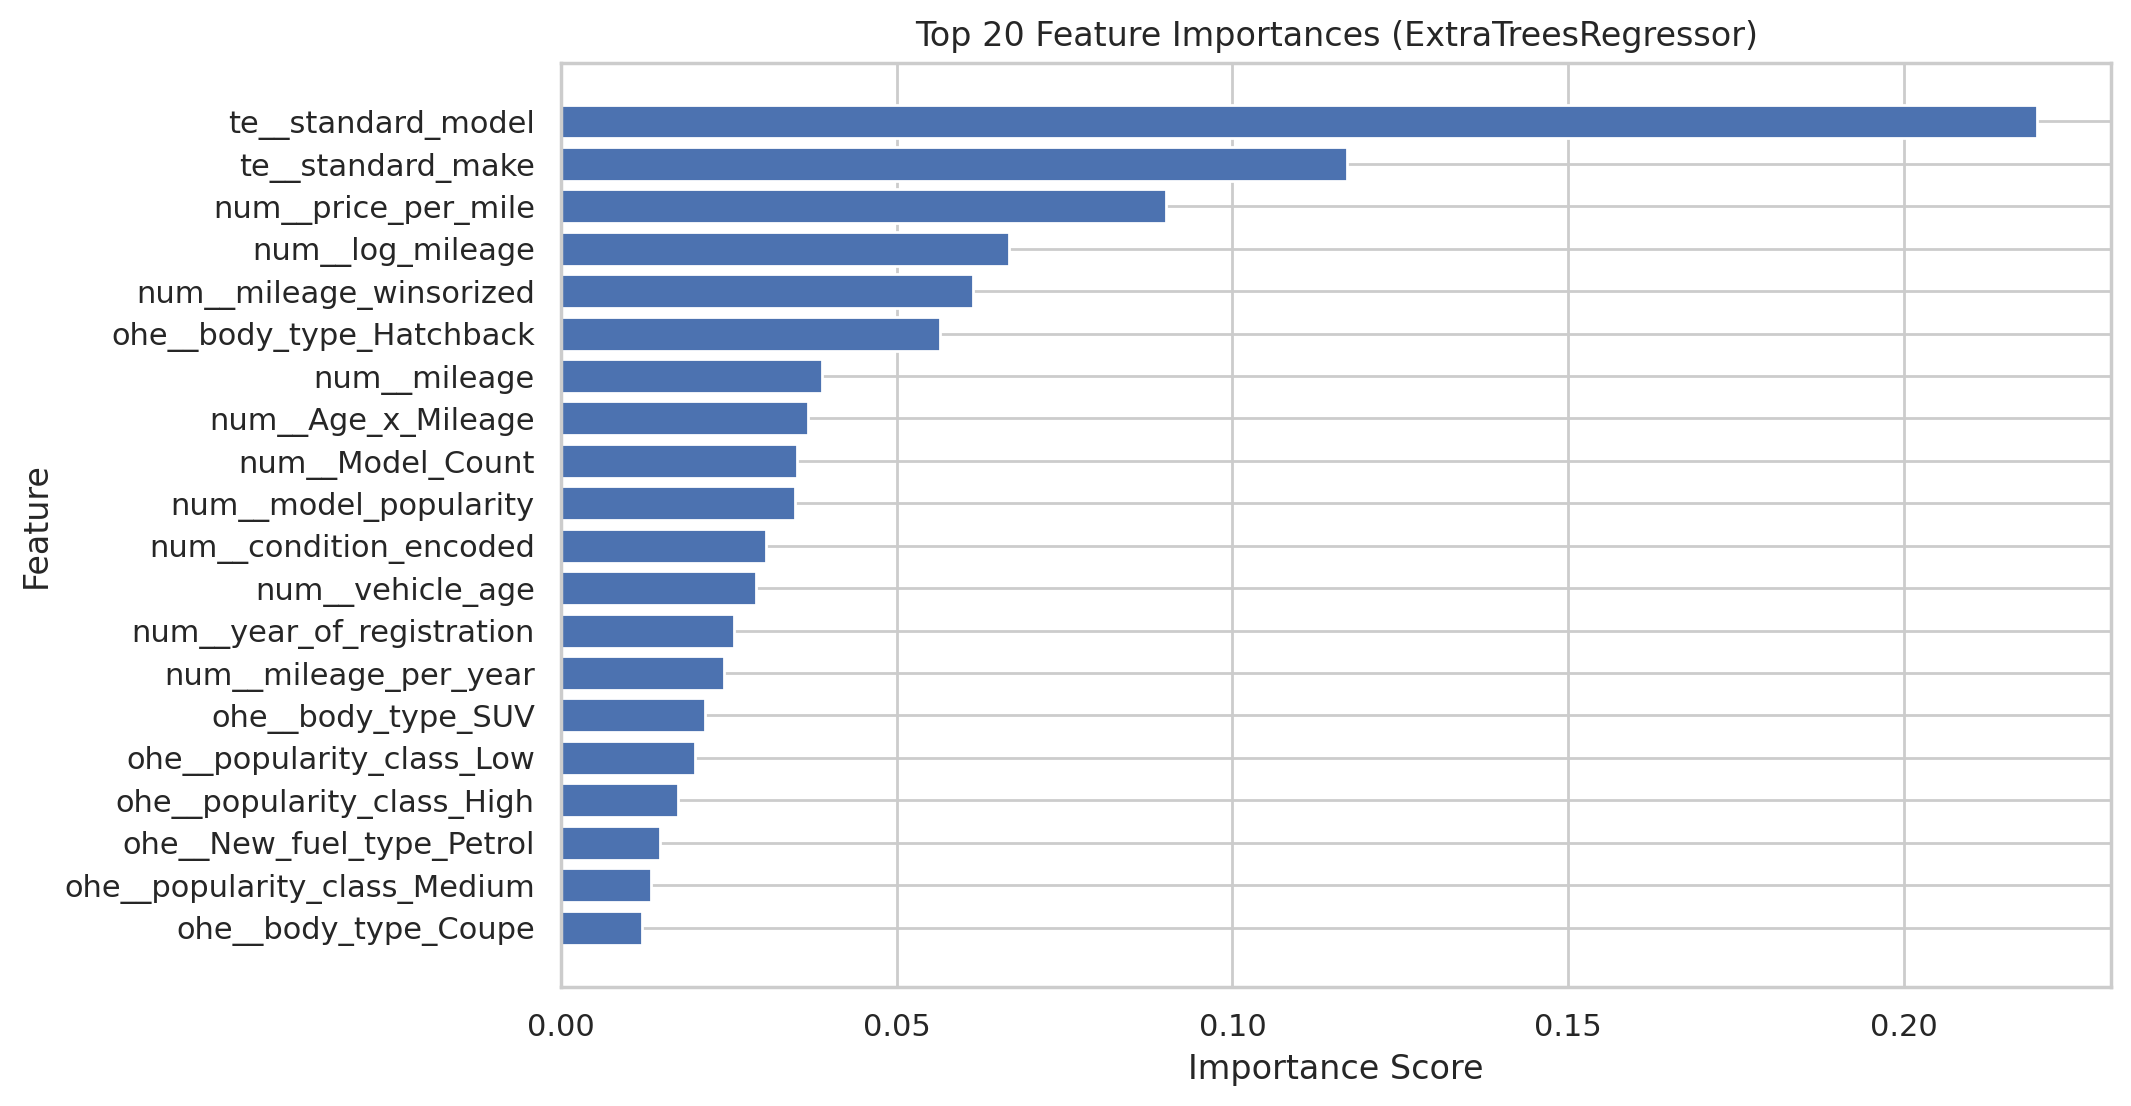

In [15]:
top20 = importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top20['feature'], top20['importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (ExtraTreesRegressor)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#3.Tree Ensembles

##3.1.TREE ENSEMBLES (BASELINES)

In [21]:

# Baseline models
rf_base = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

gb_base = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    subsample=1.0
)

# ---- Correct evaluation function ----
def fit_eval(model, X_train, y_train, X_val, y_val, X_test, y_test, name):
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    return {
        'Model': name,
        'Val_MAE': mean_absolute_error(y_val, val_pred),
        'Test_MAE': mean_absolute_error(y_test, test_pred),
        'Test_R2': r2_score(y_test, test_pred)
    }, model


# ---- Run the baselines ----
results_base = []

res, rf_base_fitted = fit_eval(
    rf_base, X_train_fs, y_train, X_val_fs, y_val, X_test_fs, y_test,
    "Random Forest (baseline)"
)
results_base.append(res)

res, gb_base_fitted = fit_eval(
    gb_base, X_train_fs, y_train, X_val_fs, y_val, X_test_fs, y_test,
    "Gradient Boosting (baseline)"
)
results_base.append(res)

pd.DataFrame(results_base)


,Model,Val_MAE,Test_MAE,Test_R2
0,Random Forest (baseline),636.993169,640.874144,0.987672
1,Gradient Boosting (baseline),1941.277430,1933.805453,0.944436


##3.2.TREE ENSEMBLES (TUNING)

In [ ]:
##3.2.TREE ENSEMBLES (TUNING)